In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # import integrator routine


def simulate(f,
             init_state,
             t0=0,
             tf=1,
             N=500,
             size =(6, 4),
             show_plot=False):

    t = np.linspace(t0, tf, N)  # Create time span

    x_sol = []
    for x_init in init_state:
        # integrate system "sys_ode" from initial state $x0$
        x_sol.append(odeint(f, x_init, t))

    plt.figure(figsize=size)
    if show_plot:
        for sol in x_sol:
            plt.plot(t, sol, linewidth=2.0)
        plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.7)
        plt.grid(True)
        plt.xlim([t0, tf])
        plt.ylabel(r'State $x$')
        plt.xlabel(r'Time $t$ (s)')
        plt.tight_layout()
    # show()
        plt.show()


    return x_sol


def phase_portrait(f,
                   x_range=[1, 1],
                   cmap='gray',
                   contour=False,
                   #    show_plot=False,
                   size=(7, 5),
                   density=0.95,
                   draw_grid=False,
                   ):

    x1_max, x2_max = x_range
    x1_span = np.arange(-1.1*x1_max, 1.1*x1_max, 0.1)
    x2_span = np.arange(-1.1*x2_max, 1.1*x2_max, 0.1)
    x1_grid, x2_grid = np.meshgrid(x1_span, x2_span)
    dx1, dx2 = f([x1_grid, x2_grid], 0)

    dist = (x1_grid**2 + x2_grid**2)**0.5
    lw = 0.8*(2*dist + dist.max()) / dist.max()

    # figure(figsize=size)
    plt.title('Phase Portrait')

    if contour:
        plt.contourf(x1_span, x2_span, dist, cmap=cmap, alpha=0.15)

    plt.streamplot(x1_span, x2_span, dx1, dx2, arrowsize=1.2,   density=density, color=dist,
               cmap=cmap, linewidth=lw, arrowstyle='->')  # ,color=L, cmap='autumn', linewidth = lw)

    plt.xlabel(r'State  $x_1$')
    plt.ylabel(r'State  $x_2$')

    plt.xlim([-x1_max, x1_max])
    plt.ylim([-x2_max, x2_max])
    if draw_grid:
        plt.grid(color='black', linestyle='--', linewidth=1.0, alpha=0.3)
        plt.grid(True)
    plt.tight_layout()
    # show()

    return None


## **Modern Control Paradigms:**
### **Lecture 2: Basics of System Analysis and Control Design, Stability, Pole-placement, Lyapunov analysis, Region of Attraction**

Goals for today:

* Recall the analysis techniques for LTI systems: **stability**, pole placement, **controllability**, 
* Study the different approach for LTI controlability: **Hautus lemma**
* Recall the properties and techniques dedicated to nonlinear systems: **linearization**, equilibriums
* Study **Lyapunov's direct method** and relationships to **invariant sets**: estimation of **basin of attraction via sampling**



### **Basics of System Analysis and Control Design**

### **Concepts of Stability**

Once the equlibrium or nominal motion is given, the natural question to ask is that how system will behave nearby.
This question is directly related to so called **stability**

Various types of stability may be discussed for the solutions of differential equations or difference equations describing dynamical systems. The one practically important type is that concerning the stability of solutions near a point of equilibrium. This may be analyzed by the theory of **Aleksandr Lyapunov**. 

In simple terms, if the solutions that start out near an equilibrium point $\mathbf{x}_{e}$ stay near $\mathbf{x}_{e}$ forever, then $\mathbf{x}_{e}$ is Lyapunov stable. More strongly, if $\mathbf{x}_{0}$ is Lyapunov stable and all solutions that start out near $\mathbf{x}_{e}$ converge to $\mathbf{x}_e$, then $\mathbf{x}_{e}$ is asymptotically stable. 




A strict definitions are as follows:

Equilibrium $\mathbf{x}_e$ is said to be:
*   **Lyapunov stable** if:
$$
\forall \epsilon>0,\exists\delta>0, \|\mathbf{x}(0) - \mathbf{x}_e\|<\delta \rightarrow \|\mathbf{x}(t) - \mathbf{x}_e\|<\epsilon, \quad \forall t
$$
*   **Asymptotically stable** if it is Lyapunov stable and:
$$
\exists \delta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow \lim_{t\to\infty} \|\mathbf{x}(t) - \mathbf{x}_e\| = 0, \quad \forall t
$$
*   **Exponentially stable** if it is asymptotically stable and:
$$
\exists \delta, \alpha, \beta >0, \|\mathbf{x}(0) - \mathbf{x}_e\|< \delta, \rightarrow  \|\mathbf{x}(t) - \mathbf{x}_e\| \leq\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}, \quad \forall t  
$$

Conceptually, the meanings of the above terms are the following:

*   **Lyapunov stability** of an equilibrium means that solutions starting "close enough" to the equilibrium (within a distance $\delta$  from it) remain "close enough" forever
*   **Asymptotic stability** means that solutions that start close enough not only remain close enough but also eventually converge to the equilibrium.
*  **Exponential** stability means that solutions not only converge, but in fact converge faster than or at least as fast as a particular known rate $\alpha\|\mathbf{x}(0) - \mathbf{x}_e\|^{-{\beta}t}$


### **Stability of LTI systems**

Let us start with stability of LTI systems:
$$
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x}
$$
An integral above can be calculated analytically:
$$
\mathbf{x}^*(t)=e^{\mathbf{A}t}\mathbf{x}(0)
$$
where matrix exponential is defined via power series:
$$
 e^{\mathbf{A}t}=\sum _{k=0}^{\infty }{1 \over k!}\mathbf{A}^{k}t^k
$$



A natural questions to ask:
*   How to calculate this matrix exponential without power series?
*   Do we need can we analyze the behaviour of solutions without explicitly solving ODE?




Let us first consider the first question, assume for a while that we can do the following factorization:
$$
\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}  
$$

Thus defining new variables $\mathbf{z} = \mathbf{Q}^{-1}\mathbf{x}$ yields:
$$
\dot{\mathbf{z}} = \mathbf{\Lambda}\mathbf{z}
$$
Which is in fact just a system of decoupled equations:
$$
\dot{z}_i = \lambda_i z_i,\quad i = 1,2\dots,n
$$
with known solutions:
$$
z^*_i = e^{\lambda_i t} z_i(0)
$$

Recalling that $\lambda_i$ is nothing but eigenvalues of matrix $\mathbf{A}$, thus one may discuss behavior of solution without explicitly calculating them, just by linear analysis on $\mathbf{A}$! 





The solution $z_i =  e^{\lambda_i t}z_i(0)$ can be decomposed using Euler's identity:
$$
    z_i =  e^{\lambda_i t}z_i(0) =
    e^{(\alpha_i + i \beta_i) t}z_i(0) =
    e^{\alpha_i t} 
          e^{i \beta_i t}z_i(0) = 
    e^{\alpha_i t} 
    (\cos(\beta_i t) + i \sin(\beta_i t))z_i(0)
$$
where $\lambda_i = \alpha_i + i \beta_i, \operatorname{Re}{\lambda_i} = \alpha_i, \operatorname{Im}{\lambda_i} = \beta_i$



Since $\| (\cos(\beta_i t) + i \sin(\beta_i t))\| =1$ thus, norm of $z_i$:

---
* Bounded if $\operatorname{Re}{\lambda_i} = \alpha_i \leq 0, \forall i$,, hence the system is **Lyapunov stable**. 
* Decreasing if $\operatorname{Re}{\lambda_i} = \alpha_i < 0, \forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, \operatorname{Re}{\lambda_i} = \alpha_i > 0$, hence the system is **unstable**. 
---

**Example:**

Determine for which values of b the following system is stable and for which it is not:
$$
\ddot{y} + b\dot{y} + y = 0  
$$

First let us formulate the state space representation:
$$
\mathbf{A} = 
\begin{bmatrix}
0 & 1 \\ 
-1 & -b \\   
\end{bmatrix}
$$

the characteristing polynomial is:
$$
\Delta(\lambda) = \lambda^2 + \lambda b + 1
$$

with roots $\lambda_{1,2} = -\frac{b}{2} \pm \sqrt{(\frac{b}{2})^2 -1}$


Thus for $b>0$, $\operatorname{Re}{\lambda_i} < 0$ and system is stable, for $b<0$ $\operatorname{Re}{\lambda_i} > 0$ and system is unstable, while for $b = 0$ $\operatorname{Re}{\lambda_i} = 0$ and system is marginally stable.

**Example:**

Check the stability of ordinary 4-rd order differential equation in canonical form:
$$
y^{(3)} + 2\ddot{y} + 3\dot{y}  + y = 0  
$$

The system matrix is given by:
$$
\mathbf{A} = 
\begin{bmatrix}
0 & 1 & 0 \\ 
0 & 0 & 1 \\ 
-2 & -3 & -1 \\  
\end{bmatrix}
$$

Let us calculate eigen-values:

In [74]:
A = np.array([[0, 1, 0],
              [0, 0, 1], 
              [-2, -3, -1]])
              
lambdas, Q = np.linalg.eig(A)
np.real(lambdas)

array([-0.71522524, -0.14238738, -0.14238738])

The very similar analysis may be performed in case of **discrete dynamics** in form:
$$
\mathbf{x}_{k+1}=\mathbf{A}\mathbf{x}_k
$$

And the stability criterion will be as follows:

---
* Bounded if $ |\lambda_i|\leq 1,\forall i$, hence the system is **Lyapunov stable**. 
* Decreasing if $|\lambda_i| < 1,\forall i$, hence the system is **asymptotically** and moreover **exponentially** stable. 
* Increasing if $\exists i, |\lambda_i|>1 $, hence the system is **unstable**. 
---

**Exercise:**
Consider again the 'damper system' described by matrix:
$$
\mathbf{A} = 
\begin{bmatrix}
0 & 1 \\ 
-1 & -b \\   
\end{bmatrix}
$$

Suppose that you know that $|b|<2$, does this imply that system is stable? If not, find the tightest bound on $b$.

### **From Analysis to Design: Pole placement**
As we have seen above, the proof of stability of a linear system is fairly straightforward and can be carried out through the analysis of eigenvalues, the natural question arises: can we transform an unstable system into a stable one by means of control? 

To answer this let us consider a LTI system:
$$
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
$$


with control $\mathbf{u}$ being the **full state linear feedback**:
$$
\mathbf{u} = \boldsymbol{\phi}(\mathbf{x}) = -\mathbf{K}\mathbf{x}
$$

Substitution to system dynamics yields following closed loop relations:
$$
\dot{\mathbf{x}} = (\mathbf{A}-\mathbf{B}\mathbf{K})\mathbf{x} = \mathbf{A}_c\mathbf{x}
$$

Thus the control design dedicated to stabilize original system **seen as modifying the eigen values of matrix $\mathbf{A}_c$ such that the resulting system will have required properties** (namely stability, response time etc). 

This method is called **pole-placement** (poles - are other names for eigen values).



In [75]:
from scipy.signal import place_poles

Let us test the pole placement technique to stabilize several linear systems.

**Example: Pole placement for mass-spring, PD regulator.**

Consider the mass-spring system:

$$
\dot{\mathbf{x}}
 = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} =
\begin{bmatrix}
\dot{y}\\
\ddot{y}
\end{bmatrix}=
\begin{bmatrix}
0 & 1\\
-\frac{k}{m} & 0
\end{bmatrix}
 \begin{bmatrix}
y\\
\dot{y}
\end{bmatrix}+
\begin{bmatrix}
0\\
\frac{1}{m}
\end{bmatrix}u
$$

In case of this two dimensional linear mechanical system we can put the poles analytically. Thus arriving to so called PD controller $u = -k_1 y - k_2 \dot{y}$. 

Indeed the characteristic polynomial of closed loop system $\mathbf{A - B\mathbf{K}}$ is:
$$
\Delta(\lambda) = \lambda(\lambda + k_2) + \frac{k+ k_1}{m}  = \lambda^2 +  \frac{k_2}{m}\lambda + \frac{k+ k_1}{m}
$$

Obviously we can place poles whatever we want by varying $k_1, k_2$.


**Example: Pole placement for DC motor**
Design the controller that will steer angle for the DC motor driven by the voltage $V$ with state space representation:

$$
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} \\
\dot{i}
\end{bmatrix} =
\begin{bmatrix}
0 & 1 & 0 \\
0 & -\frac{b}{J} & \frac{K_m}{J} \\
0 & -\frac{K_e}{L} & -\frac{R}{L}
\end{bmatrix} 
\begin{bmatrix}
\theta \\
\dot{\theta} \\
i
\end{bmatrix}
+
\begin{bmatrix}
0 \\
0 \\
\frac{1}{L}
\end{bmatrix}V
$$


Let's define parameters first:

In [76]:
k_m = 0.0274
k_e = k_m
J = 3.2284E-6
b = 3.5077E-6
L = 2.75E-6
R = 4

The state space matrices:

In [77]:
A_dc = [[0, 1, 0],
        [0, -b/J, k_m/J],
        [0, -k_e/L, -R/L]]

B_dc = [[0],
        [0],
        [1/L]]



Let us try to place the poles in the following locations:

[-10. -20. -30.]


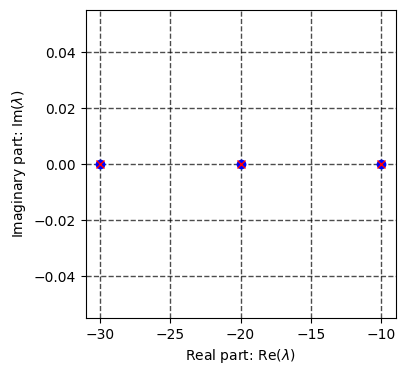

In [78]:
P = 10*np.array([-1+0j, -2-0j, -3 - 0j])

K_dc = place_poles(np.array(A_dc), np.array(B_dc), np.array(P)).gain_matrix
Ac = A_dc - B_dc@K_dc
eigs = np.linalg.eigvals(Ac)
print(eigs)

plt.figure(figsize=(4, 4))
plt.plot(P.real, P.imag, 'bo', label='Desired')
plt.plot(eigs.real, eigs.imag, 'rx',label='Actual')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlabel(r'Real part: ${ \operatorname{Re}(\lambda)}$')
plt.ylabel(r'Imaginary part: ${ \operatorname{Im}(\lambda)}$')
plt.show()

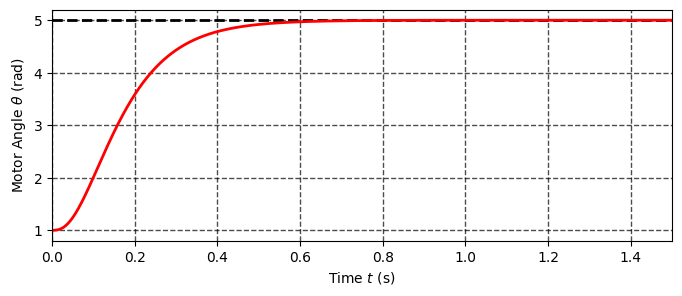

In [79]:
def system_ode(x, t, A, B, K, x_d):
    x_e = x_d - x 
    u = np.dot(K,x_e)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

tf = 1.5 # Final time
N = int(2E3) # Numbers of points in time span
t = np.linspace(0, tf, N) # Create time span

# Set initial state
x0 = [1, 0, 0]  
# Desired point
x_d = [5, 0, 0]

x_sol = odeint(system_ode, x0, t, args=(A_dc, B_dc, K_dc,x_d,)) # integrate system "sys_ode" from initial state $x0$
theta, dtheta, i = x_sol[:,0], x_sol[:,1], x_sol[:,2] # set theta, dtheta to be a respective solution of system states


plt.figure(figsize=(8, 3))
plt.hlines(x_d[0], min(t), max(t), color = 'black', linestyles='--', linewidth=2.0)
plt.plot(t, theta, 'r', linewidth=2.0)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, tf])
plt.ylabel(r'Motor Angle ${\theta}$ (rad)')
plt.xlabel(r'Time $t$ (s)')
plt.show()



That's all good, but what are the conditions on which we can place poles? Can we do this always for whatever $\mathbf{A}$ and $\mathbf{B}$? 


Let us for example consider the following linear system:

$$
    \begin{cases}
        \dot{x}_1 = x_1 + x_2 + u\\
        \dot{x}_2 = ax_2 
    \end{cases} 
$$



Which can be transformed to LTI state space via:

$$
\mathbf{A} = 
\begin{bmatrix}
a & 1 \\ 
0 & b \\   
\end{bmatrix}, 
\quad\mathbf{B} = 
\begin{bmatrix}
1 \\ 
0 \\   
\end{bmatrix}
$$

Let us define the system and place poles:

In [80]:
a = -1
b = 1
A = np.array([[1, 1],
              [0, a]])

B = np.array([[1],
              [0]])

P = np.array([-1, -4])
K = place_poles(np.array(A), np.array(B), np.array(P)).gain_matrix
K

array([[5., 1.]])

Given the feedback $\mathbf{u} = -k_1 x_1 - k_2 x_2$ the characteristic polynomial is:
$$
\Delta(\lambda) = (\lambda - a + k_1)(\lambda - b)
$$
so we can't place poles at **any** desired locations (at least one of them), does it necessarily mean that we can't stabilize the system above? 

We can't hope to place poles whenever we want for any desired system. In the end it may happen that system can't be controlled at all or there is certain directions in the state space that are not achievable. 

### **Controlability**

Controllability is an important property of a control system, and the controllability property plays a crucial role in many control problems, such as stabilization of unstable systems by feedback, or optimal control. Roughly, the concept of controllability denotes the ability to move a system around in its entire configuration space using only certain admissible manipulations. 

The most widely used notions of controlability was introduce by Kalman with help of following $n\times nm$ matrix:

$$
\boldsymbol{\mathcal{C}}=
\begin{bmatrix}
\mathbf{B}&
\mathbf{AB}&
\mathbf{A^{{2}}B}&
...&
\mathbf{A^{{n-1}}B}
\end{bmatrix}
$$

The theory says that system is **full state controllable iff** the controllability matrix has full row rank:

$$
\text{rank}\{\boldsymbol{\mathcal{C}}\}
=n
$$

There are tight relationships between controlability and pole placement technique, if system is **controlable** one may place poles **at any desired locations**. In fact in most pole-placement algorithms (for instance celebrated [Ackerman formula](https://en.wikipedia.org/wiki/Ackermann%27s_formula)) one need to invert controllability matrix! 

The code that implement above is straight forward:

In [81]:
def ctrb(A, B):
    C = B
    n = np.shape(A)[0]
    # print(n)
    for i in range(1, n):
        A_pwr_n = np.linalg.matrix_power(A, i)
        C = np.hstack((C, A_pwr_n.dot(B)))
    rank_C = np.linalg.matrix_rank(C)

    if rank_C == n:
        test = 'controllable'
    else:
        test = 'uncontrollable'
    return C, rank_C, test

Let's test the controllability of systems that we have considered above. 

In [82]:
ctrb(A, B)

(array([[1, 1],
        [0, 0]]),
 1,
 'uncontrollable')

Now we can test for controllability just by analyzing the products of $\mathbf{A}$ and $\mathbf{B}$ matrices. However there are two issues with celebrated Kalman method. First of all - it is **numerically not stable** (the powers of $\mathbf{A}$ is prone to accumulation of errors for higher dimensions of $n$ and badly scaled $\mathbf{A}$ and $\mathbf{B}$). 

**Example: Wrong Controlability for DC motor**

Consider the DC motor given above with following parameters:


In [83]:
k_m = 0.0274
k_e = k_m
J = 3.2284E-6
b = 3.5077E-6
L = 2.75E-6
R = 4

Let us run controllability test:

In [84]:
A = [[0, 1, 0],
        [0, -b/J, k_m/J],
        [0, -k_e/L, -R/L]]

B = [[0],
        [0],
        [1/L]]

ctrb(A, B)

(array([[ 0.00000000e+00,  0.00000000e+00,  3.08624593e+09],
        [ 0.00000000e+00,  3.08624593e+09, -4.48908834e+15],
        [ 3.63636364e+05, -5.28925620e+11,  7.69315606e+17]]),
 2,
 'uncontrollable')

Oups the answer is surprising, even though we were able to place poles the system is said to be uncontrollable. The issues are indeed numerical (check the inductance parameter $L$)  

Appart from numerical issues, there is also fundamental one, Kalman controllability is "binary", basically we have just yes/no answer, while there is no information on structure of problem, i.e. which directions are uncontrollable and why. Fortunately there is another method that allow us to study linear controllability problem.  

### **Popov-Belevitch-Hautus Controllability**

The alternative view of controlability was provided separately by  Hautus, Popov and Belevitch in the 1970-th. it is known as **Hautus lemma**, also commonly known as the Popov-Belevitch-Hautus test or PBH test.

The lemma is stated as follows, pair $\{\mathbf{A}, \mathbf{B}\}$ is said to be controllable iff:

$$
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \zeta \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall \zeta \in 
  \mathbb{C}
$$



However the only way for $\mathbf{A} - \lambda\mathbf{I}$ to lose the rank is for $\lambda$ to be the eigenvalue of $\mathbf{A}$, thus instead of checking the entire complex plane we may consider just the eigenvalues:

$$
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \lambda_i \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall i \in 
  \{1, 2,\dots, n\}
$$


In [85]:
def pbh(A, B):
    lambdas, v = np.linalg.eig(A)
    n = np.shape(A)[0]
    ranks = n*[0]
    test = 'controllable'
    for i in range(n):
      A_e = A - lambdas[i]*np.eye(n)
      M = np.hstack((A_e, B))
      ranks[i] = np.linalg.matrix_rank(M)
      if ranks[i] != n:
        test = 'uncontrollable'
    return lambdas, ranks , test

In [86]:
eigs, ranks, test = pbh(A_dc,B_dc)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )

Eigen values of PBH matrices:
[ 0.00000000e+00 -5.92260385e+01 -1.45448732e+06]

Ranks of the PBH matrices: [3, 3, 3],
system is controllable


it is interesting to see that:
$$
\mathbf{B}
\notin
\mathcal{C}(\mathbf{A} - \lambda_i \mathbf{I})
\quad
\forall i \in 
\{1, 2,\dots, n\}
$$

The matrix $\mathbf{B}$ better to not be aligned with **some of the eigenvectors** 

In [87]:
lambdas, v = np.linalg.eig(A)
B = [v[:,0]]
B = np.array(B).T
# B = B_cp
# R, rank, test = ctrb(A_cp, B)
# print(f'Contralability matrix:\n{R}\n\nRank of the controlability matrix: {rank},\nsystem is {test}\n' )

eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )


Eigen values of PBH matrices:
[ 0.00000000e+00 -5.92260385e+01 -1.45448732e+06]

Ranks of the PBH matrices: [3, 2, 2],
system is uncontrollable


Thus PBH test give us some tips on how matrix $\mathbf{B}$ should be organized! Moreover condition above provide the insight on the **minimal number of the control channels** that we need for sytem to be controllable and is directly related to the multiplicity of the eigenvalues

In [88]:
n = len(lambdas)

for i in range(n):
    A_e = A - lambdas[i]*np.eye(n)
    print(f'Eigenvalue s: {lambdas[i]}')
    print(f'Rank of A - sI: {np.linalg.matrix_rank(A_e)}')
    print(f'Rank difficiency: {n - np.linalg.matrix_rank(A_e)}\n')

Eigenvalue s: 0.0
Rank of A - sI: 2
Rank difficiency: 1

Eigenvalue s: -59.2260384876281
Rank of A - sI: 2
Rank difficiency: 1

Eigenvalue s: -1454487.3150204099
Rank of A - sI: 2
Rank difficiency: 1



As we can see the PBH test is much more applicable and practical, this will become even more evident when we start working with systems with relatively large dimensions - derived with data driven approaches.


Moreover PBH test can be used to analyze some other interesting properties, namely directions of 'natural stability' and which are need to be stabilized with control!

Let us for example consider the following linear system:

$$
    \begin{cases}
        \dot{x}_1 = a x_1 + x_2 + u\\
        \dot{x}_2 = bx_2 
    \end{cases} 
$$

with $a = -1, b = -1$

Which can be transformed to LTI state space via:

$$
\mathbf{A} = 
\begin{bmatrix}
-1 & 1 \\ 
0 & -1 \\   
\end{bmatrix}, 
\quad\mathbf{B} = 
\begin{bmatrix}
1 \\ 
0 \\   
\end{bmatrix}
$$

In [89]:
A = np.array([[-1, 1],
              [0, -1]])

B = np.array([[1],
              [0]])


It is trivial to show that all trajectories converges to $\mathbf{x} = 0$ with linear feedback $u = -2x_2$ (check the eigenvalues). 

In [90]:
K = np.array([[0, 2]])
lambdas, Q = np.linalg.eig(A - B@K)
print(np.real(lambdas))

[-1. -1.]


Let us simulate this system:

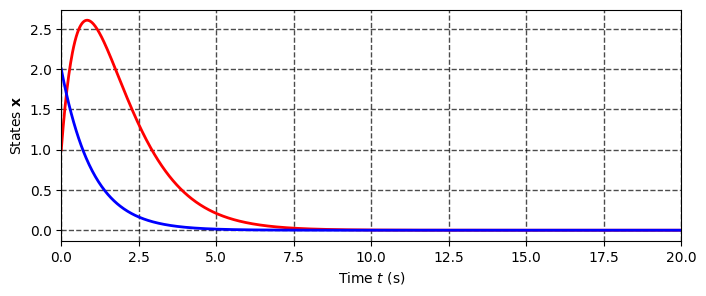

In [91]:
def system_ode(x, t, A, B, K):
    u = np.dot(K,x)  
    dx = np.dot(A,x) + np.dot(B,u)
    return dx

tf = 20# Final time
N = int(1E3) # Numbers of points in time span
t = np.linspace(0, tf, N) # Create time span

# Set initial state
x0 = [1, 2]  

x_sol = odeint(system_ode, x0, t, args=(A, B, K,)) # integrate system "sys_ode" from initial state $x0$
x_1, x_2 = x_sol[:,0], x_sol[:,1] # set theta, dtheta to be a respective solution of system states

plt.figure(figsize=(8, 3))
plt.plot(t, x_1, 'r', linewidth=2.0)
plt.plot(t, x_2, 'b', linewidth=2.0)
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, tf])
plt.ylabel(r'States $\mathbf{x}$')
plt.xlabel(r'Time $t$ (s)')
plt.show()

Let us check what the PBH will conclude:

In [92]:
eigs, ranks, test = pbh(A,B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}' )

Eigen values of PBH matrices:
[-1. -1.]

Ranks of the PBH matrices: [1, 1],
system is uncontrollable


So PBH state that system is uncontrollable while we were able to stabilize it with linear feedback! The issue that the problems of stabilizability and controllability are not equivalent.

### **Stabilizability**

A slightly weaker notion than controllability is that of stabilizability. A system is said to be stabilizable when all uncontrollable state variables can be made to have stable dynamics. Thus, even though some of the state variables **cannot be controlled** (as determined by the controllability test above) all the state variables will still remain **bounded during** the system's behavior.

**Stabilizable** systems should be controllable only for the unstable eigenvalues i.e:

$$
\text{rank}\{ 
\begin{bmatrix}
\mathbf{A} - \lambda_i \mathbf{I}
&
\mathbf{B}
\end{bmatrix}
  \} =n, \quad
  \forall \lambda \in \{c: \text{Re}(c)\geq0\}
$$

One can slightly modify the controllability test to have following:

In [93]:
def pbh(A, B):
    lambdas, v = np.linalg.eig(A)
    n = np.shape(A)[0]
    ranks = n*[0]
    # M = n*[0]
    unctrl_eigs = []
    test = 'controllable'
    for i in range(n):
        M = np.hstack((A - lambdas[i]*np.eye(n), B))
        ranks[i] = np.linalg.matrix_rank(M)
        if ranks[i] != n:
            unctrl_eigs.append(lambdas[i])

    if np.all(np.array(unctrl_eigs) < 0):
        test = 'uncontrollable but stabilizable'

    else:
        test = 'uncontrollable'

    return lambdas, ranks, test



In [94]:

eigs, ranks, test = pbh(A, B)
print(f'Eigen values of PBH matrices:\n{eigs}\n\nRanks of the PBH matrices: {ranks},\nsystem is {test}')


Eigen values of PBH matrices:
[-1. -1.]

Ranks of the PBH matrices: [1, 1],
system is uncontrollable but stabilizable


Thus, for linear systems we can address a variety of issues using n**umerical techniques based on linear algebra**, moreover, the controller **synthesis is also performed numerically** - with pole placement.

However, the pole assignment is an great technique, but it has two fundamental disadvantages, 
* As the order of the system increases, pole placement becomes a tricky and non-trivial problem since there is no simple mapping between response and the pole locations (partially solved by **optimal control** routines like LQR which we will discuss in the upcoming classes)
* This method is **applicable to linear systems** while most of the real systems are non-linear! 

The second problem is actually a fundamental one; The main the question is, **can we apply linear control to nonlinear systems**? And if yes what kind of tools do we need to analyze the resulting closed loop system.

### **Nonlinear Systems, Equilibriums**

One of the most natural questions ask while studying dynamical systems: Is there any special points or regions such that if system start there will remain there forever? Such regions are called invariant, and in most simple case their represented by so called singular or **equilibrium** points.

It is particular easy to find equilibriums by looking for such $\mathbf{x}_e$ that makes $\dot{\mathbf{x}}$ vanish, basicly one should just solve for roots of:
$$
\mathbf{f}(\mathbf{x}_e) = \mathbf{0}
$$



Note that for linear systems one have the following:
$$
\mathbf{A}\mathbf{x}_e = \mathbf{0}
$$
thus equilibriums are either trivial solution $\mathbf{x}_e = \mathbf{0}$ or nullspace $\text{Null}\{\mathbf{A}\}$ 



One may always transform the original dynamics to the new variables $\tilde{\mathbf{x}} = \mathbf{x} - \mathbf{x}_e$ such that:
$$
\dot{\tilde{\mathbf{x}}} = \mathbf{}\mathbf{f}(\tilde{\mathbf{x}}+\mathbf{x}_e)
$$
we call the expression above **error** or **perturbation** dynamics



There are different tools that facilitate this analysis.

**Example:**

Find the equlibriums of following nonlinear system:
$$
\dot{x} = -x + x^3
$$

In [95]:
import sympy as sp
x = sp.symbols(r'x')
sp.solve(-x + x**3, x)

[-1, 0, 1]

**Example:**

Find the equlibriums of nonlinear pendulum:
$$
\dot{\mathbf{x}}=
\begin{bmatrix}
x_2 \\ 
\sin(x_1) + x_2
\end{bmatrix}
$$

In [96]:
import sympy as sp
x = sp.symbols(r'x_1 x_2')
sp.solve([x[1], sp.sin(x[0]) + x[1]], x)

[(0, 0), (pi, 0)]

### **Local Behavior and Linearization**

As one note for LTI systems stability is completely determined by the eigenvalues of $\mathbf{A}$, 
however in the nonlinear case there are no notion of eigenvalues, a one of the most straightforward ideas 
is to approximate the nonlinear system in the vicente of equilibrium point using the first term of Taylor series:
 
$$
\dot{\mathbf{x}}
= \mathbf{f}(\mathbf{x}_e)+ 
\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e} 
(\mathbf{x} - \mathbf{x}_e)
$$


Introducing the error $\tilde{\mathbf{x}}$ we may rewrite the equation above in linear form as follows:

\begin{equation*}
\dot{\tilde{\mathbf{x}}} = \mathbf{A}\tilde{\mathbf{x}}
\end{equation*}
where: $\mathbf{A} = \frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_e}$ 





---

Thus linearization consist of three steps:
1.   Solving $\mathbf{f}(\mathbf{x}_e) = \mathbf{0}$ for equilibriums.
2.   Calculation of the system Jacobian with respect to state $\mathbf{x}$
3.   Evaluation of the resulting Jacobian in the equilibrium points $\mathbf{x}_e$

---


The procedure above is known as Lyapunov linearization method and can be used to find the local stability properties of nonlinear systems 
nearby equlibrium by studying their linear aproximations as follows:

* If the linearized system is **strictly stable** (i.e, $\operatorname{Re}{\lambda_i} = \alpha_i = 0, \forall i$), then the equilibrium point is **asymptotically stable** (for the **actual nonlinear** system).
* If the linearized system is **unstable** ($\exists i, \operatorname{Re}{\lambda_i} = \alpha_i > 0$), then the equilibrium point is **unstable**
(for the **nonlinear system**).
* If the linearized system is **marginally stable** ($\operatorname{Re}{\lambda_i} = \alpha_i \leq 0, \forall i$), then
one **can't conclude anything** from the linear approximation (the equilibrium
point may be stable, asymptotically stable, or unstable for the nonlinear system).

**Example:**

Let us apply the linearization method on following systems:

$$
\ddot{x} = \dot{x} + 3 x + x^2
$$

In [97]:
import sympy as sp

def f(x, t):
    return x[1], -x[1] - 3*x[0]-x[0]**2


x = sp.symbols(r'x_1, x_2')
f_sym = sp.Matrix([f(x, 0)]).T
f_sym
equlibriums = sp.solve(f_sym, x)
print(equlibriums)

[(-3, 0), (0, 0)]


In [98]:
jacobian = f_sym.jacobian(x)
jacobian

Matrix([
[         0,  1],
[-2*x_1 - 3, -1]])

In [99]:
jacobian_num = sp.lambdify([x], jacobian)

for equlibrium in equlibriums:
    x_e = np.array(equlibrium, dtype='double')
    A = np.array(jacobian_num(x_e), dtype='double')
    lambdas, Q = np.linalg.eig(A) 
    print(f'The matrix A for equlibrium {x_e} is: \n {A} \n Eigen values:\n {lambdas} \n')
### **Stability via Lyapunov Linearization Method**


The matrix A for equlibrium [-3.  0.] is: 
 [[ 0.  1.]
 [ 3. -1.]] 
 Eigen values:
 [ 1.30277564 -2.30277564] 

The matrix A for equlibrium [0. 0.] is: 
 [[ 0.  1.]
 [-3. -1.]] 
 Eigen values:
 [-0.5+1.6583124j -0.5-1.6583124j] 



### **Linearization Based Control over Nonlinear Systems**

Similarly if one consider controlled system:
$$
\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, \mathbf{u})
$$

One may perform the linearization around the **operating point**:

$$
\dot{\tilde{\mathbf{x}}} = 
\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\Bigr\rvert_{\mathbf{x}_d,\mathbf{u}_d} 
\tilde{\mathbf{x}} + 
\frac{\partial\mathbf{f}}{\partial\mathbf{u}}\Bigr\rvert_{\mathbf{x}_d,\mathbf{u}_d} =
\mathbf{A}
\tilde{\mathbf{x}} + 
\mathbf{B} 
\tilde{\mathbf{u}}
$$


The operating point is found similarly to equilibrium of: $\mathbf{f}(\mathbf{x}_d, \mathbf{u}_d) = 0$


Design and analisyse of the linearized system represented by LTI is in fact identical to one you use for linear system. 
Thus the controller is still linear state feedback:
$$
\mathbf{u} = \mathbf{u}_d - \mathbf{K}\tilde{\mathbf{x}}
$$

However you will apply controller not to the linear system which you used to approximate dynamics of actual plant, thus resulting closed loop of original system will still be **nonlinear**:
$$
    \dot{\tilde{\mathbf{x}}} = \mathbf{f}(\tilde{\mathbf{x}},\mathbf{u}_d - \mathbf{K}\tilde{\mathbf{x}}) = 
    \mathbf{f}_c(\tilde{\mathbf{x}})
$$

Thus the behavior of closed loop system under influence of linear control may be drastically different from the linear one, especially if we move towards the region when linearization fails to provide the accurate description of system behavior (far from linearization point). 


**Example: Linear control over nonlinear Cart Pole.**

In order to distinguish between linear and nonlinear responses study this [colab notebook](https://colab.research.google.com/drive/1F4FbgGSjZ-rxDbnQbZft2G6R_-MC18Ld#scrollTo=uJTVJ1pCYdHV) where linearized based control is applied to cart pole system.



It is cruitial to be able to analyze stability properties of actual nonlinear system and to have at least some estimates on the regions where the linear controller is able to stabilize the system. The most widely used and elegant way to do so is based on celebrated **Lyapunov theory** and so called **Direct Method**.  

### **Lyapunov's Direct Method**

The basic philosophy of Lyapunov's direct method is the mathematical extension of a
fundamental physical observation: if the total energy of a mechanical (or electrical)
system is continuously dissipated, then the system, whether linear or nonlinear, must
eventually settle down to an equilibrium point. Thus, we may conclude the stability of
a system by examining the variation of a single scalar function $V(\mathbf{x})$.


Specifically, let us consider the nonlinear mass-damper-spring system:

$$
    m\ddot{y}+b|\dot{y}|\dot{y} +k_0 y + k_1 y^3 = 0
$$

Assume that the mass is pulled away from the
natural length of the spring by a large distance, and then released. 
Will the resulting motion be stable? A physical intuition said that it should be.



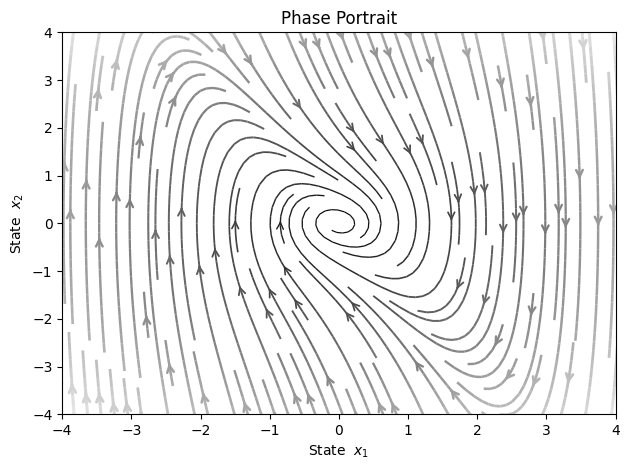

In [100]:
m, b, k0, k1 = 1, 1, 1, 1 
def f(x,t):
    y = x[0]
    dy = x[1]
    ddy = -(b*abs(dy)*dy + k0*y + k1*y**3)/m
    return dy, ddy
phase_portrait(f, x_range=[4, 4], density=1.5) 

However if one will find the Jacobian:

In [101]:

x = sp.symbols(r'y \dot{y}', real = True)
f_sym = sp.Matrix([f(x, 0)]).T

equlibriums = sp.solve(f_sym, x)
print(f'Equilibria are:\n{equlibriums}\n')
jacobian = f_sym.jacobian(x)
print(f'Jacobian is:')
jacobian


Equilibria are:
[(0, 0)]

Jacobian is:


Matrix([
[          0,                                     1],
[-3*y**2 - 1, -\dot{y}*sign(\dot{y}) - Abs(\dot{y})]])

In [102]:
from numpy import array, real
from numpy.linalg import eig

jacobian_num = sp.lambdify([x], jacobian)
for equlibrium in equlibriums:
    x_e = array(equlibrium, dtype='double')
    A = array(jacobian_num(x_e), dtype='double')
    print(f'The real part of poles for equlibrium {x_e} are: \n {real(eig(A)[0])} ')

The real part of poles for equlibrium [0. 0.] are: 
 [ 0. -0.] 



Evaluation of the Jacobian around trivial equilibrium yields marginal stability of linearized system, thus we can't say anything on nonlinear system.  


However, lets take a bit different approach. Consider the following function (energy):
$$
    V(y, \dot{y}) = 
    \frac{1}{2}m\dot{y}^2 + \frac{1}{2}k_0 y^2 + \frac{1}{4}k_1 y^4 
$$



The rate of this function (power) during the system's motion is obtained easily by
differentiating:
$$
    \dot{V}(y, \dot{y}) = m \dot{y}\ddot{y} + (k_0 y + k_1 y^3)\dot{y} = -b | \dot{y}|^3
$$
this implies the energy of the system, starting from some initial value,
is continuously dissipated by the damper until the mass settles down, i.e. $y = 0$.

Physically, it is easy to see that the mass must finally settle down at the natural length
of the spring, because it is subjected to a non-zero spring force at any position other
than the natural length.


Comparing the definitions of stability and mechanical energy, one can easily see some
relations between the mechanical energy and the stability concepts described earlier:

* zero energy corresponds to the equilibrium point ($y = 0, \dot{y}=0$)
* asymptotic stability implies the convergence of mechanical energy to zero
* instability is related to the growth of mechanical energy

These relations indicate that the **value of a scalar quantity**, the mechanical energy,
**indirectly reflects the magnitude of the state vector**.

The direct method of Lyapunov is based on a generalization of the concepts in
the above mass-spring-damper system to more complex systems. Faced with a set of
nonlinear differential equations, the basic procedure of **Lyapunov's direct method** is to
generate a **scalar "energy-like" function** for the dynamical system, and examine the time
variation of that scalar function. In this way, conclusions may be drawn on the
**stability of the set of differential equations without using the difficult stability
definitions or requiring explicit knowledge of solutions**


Such **candidate Lyapunov function** should satisfy the energy-like properties, namely be: 
* Strictly positive unless both state variables $\mathbf{x}$ are zero. 
* Monotonically decreasing when the variables $\mathbf{x}$ vary along system trajectories

In Lyapunov's direct method, the first property is formalized by the notion of **positive definite functions** (PD)

### **Positive Definite Functions**
---
A scalar continuous function $V(\mathbf{x})$ is said to be ***locally positive definite*** (LPD) in ball $\mathcal{B}_R = \{\mathbf{x} : \| \mathbf{x}\|\leq R\}$ if:
* $V(0) = 0$
* $V(\mathbf{x})>0,\ \forall \mathbf{x} \neq \mathbf{0}$ 

If above property holds $\forall\mathbf{x} \in \mathbb{R}^n$ then $V(\mathbf{x})$ is said to be ***globally positive definite*** (GPD)

---

Note that the above definition implies that the function $V$ has a unique minimum at the origin.

For instance:
* The $V(\mathbf{x}) = \frac{1}{2}x_2^2 + 1-\cos{x_1}$ is locally positive definite 
* While $V(\mathbf{x}) = \frac{1}{2}x_1^2 + \frac{1}{2}x_2^2$ is globally positive definite 


A few related concepts can be defined similarly, in a local or global sense, i.e., a
function $V(\mathbf{x})$ is negative definite if — $V(\mathbf{x})$ is positive definite; $V(\mathbf{x})$ is positive
semi-definite if $V(\mathbf{0}) = 0$ and $V(\mathbf{x}) \geq 0$ for $\mathbf{x} \neq 0$ $V(\mathbf{x})$ is negative semi-definite if - $V(\mathbf{x})$ is positive semi-definite. 

The prefix "semi" is used to reflect the possibility of $V$ being equal to zero eventhough $\mathbf{x}$ is not.


### **Global Stability via Direct Method**


Assume that there exists a scalar function $V(\mathbf{x})$ with continuous first order derivatives such that:

* $V(\mathbf{x})$ is positive definite
* $\dot{V}(\mathbf{x})$ is negative definite
* $V(\mathbf{x})\rightarrow \infty$ as $\|\mathbf{x}\|\rightarrow \infty$

then the equilibrium at the origin is **globally asymptotically stable**





### **Geometrical Interpretation**

<p align="center">
<img src="images/lyap_func.jpg" alt="drawing" width="80%" style="margin:auto"/>
</p>


**Example:**


Consider the following system:
$$
\begin{cases}
\dot{x}_1 = -x_1 + x_2  \\ 
\dot{x}_2 = -x_1 - x_2^3
\end{cases}
$$

with following Lyapunov candidate:
$$
V(\mathbf{x}) = x_1^2 + x_2^2 
$$

In [103]:
x = sp.symbols('x_1, x_2')
V_symb = x[0]**2 + x[1]**2
print(f'Lyapunov candidate:')
V_symb

Lyapunov candidate:


x_1**2 + x_2**2

In [104]:
grad_V = sp.Matrix([V_symb]).jacobian(x)
print(f'Gradient of Lyapunov candidate:')
grad_V

Gradient of Lyapunov candidate:


Matrix([[2*x_1, 2*x_2]])

In [105]:
f_symb = sp.Matrix([-x[0] + x[1],
                    -x[0] - x[1]**3])

dV = sp.simplify(grad_V*f_symb) 
print(f'Time derivative of Lyapunov candidate:')
dV[0]

Time derivative of Lyapunov candidate:


-2*x_1**2 - 2*x_2**4

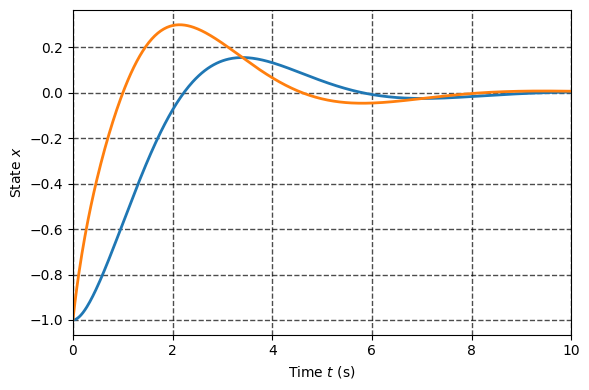

In [106]:
# Create a numerical function from symbolic one
f_num = sp.lambdify([x], f_symb)

def f(x, t):
    dx = f_num(x)[:,0]
    return dx

x_sol = simulate(f, [[-1,-1]], tf = 10, show_plot=True)

**Example: Lyapunov Functions for LTI systems**

The direct Lyapunov method can be in fact applied to linear systems as well: 
$$
    \dot{\mathbf{x}} = \mathbf{A}\mathbf{x}
$$

Consider the quadratic Lyapunov candidate:
$$
    V = \mathbf{x}^T\mathbf{P}\mathbf{x}
$$

with time derivative:
$$
    \dot{V} = \mathbf{x}^T(\mathbf{A}^T\mathbf{P} + \mathbf{P}\mathbf{A})\mathbf{x} = -\mathbf{x}^T \mathbf{Q} \mathbf{x} 
$$

where $\mathbf{Q}$ is P.D. 

One can conclude that the LTI system is stable if there is P.D solution of matrix equation:
$$
    \mathbf{A}^T\mathbf{P} + \mathbf{P}\mathbf{A} = -\mathbf{Q}
$$


**Example: Common Lyapunov Functions**

This property alone may not be very usefull, still we now how to do linear analysis just with eigen values, however it may be used in more general circumstances, for instance, suppose that the matrix $\mathbf{A}$ is unknown, but its uncertain elements can be bounded as the convex combination of a number of known matrices:
$$
\mathbf{A} = \sum_i \beta_i \mathbf{A}_i, \quad \sum_i \beta_i = 1, \quad \beta_i >0, \forall i
$$
Then one can use the direct method with the very same Lyapunov function as above to arrive to stability criteria:
$$
    \mathbf{A}_i^T\mathbf{P} + \mathbf{P}\mathbf{A}_i \preccurlyeq 0
$$

Thus if one can find the common $\mathbf{P}$ that satisfy constraints above the system may be proven to be stable for whatever $\mathbf{A}$ in the given set



**Example: Stability of The Linear Descriptor Systems**

The Lyapunov theory can be applied to so called descriptor systems in form:
$$
\mathbf{E}\dot{\mathbf{x}} = \mathbf{A}\mathbf{x}
$$

Indeed by defining the Lyapunov function as:
$$
V = \mathbf{x}^T \mathbf{E}^T \mathbf{P} \mathbf{E} \mathbf{x}
$$

One can arrive to following condition stability condition:
$$
    \mathbf{A}^T\mathbf{P}\mathbf{E} + \mathbf{E}^T\mathbf{P}\mathbf{A} \preccurlyeq 0
$$

To match this condition one should solve for: $\mathbf{A}^T\mathbf{P}\mathbf{E} + \mathbf{E}^T\mathbf{P}\mathbf{A} = -\mathbf{Q}$, which is known as generalized Lyapunov equation. 


**Example: Convergence Rates for Nonlinear Systems**

One can use tha Lyapunov like arguments to deduce not only stability but the **convergence rates** for trajectories, let us consider the real function $V(t)$ that satisfy inequality:
$$
    \dot{V} + \alpha V\leq0
$$
where $\alpha$ is real number, then:
$$
    V(t) \leq V(0)e^{-\alpha t}
$$

Thus one can estimate **speed of convergence** for system trajectories just by finding apropriate $V$

### **Local Stability and Direct Method**


If, in a ball $\mathcal{B}_R$, there exists a scalar function $V(\mathbf{x})$
with continuous first partial derivatives such that:

* $V(\mathbf{x})$ is positive definite (locally in $\mathcal{B}_R$)
* $\dot{V}(\mathbf{x})$ is negative semi-definite (locally in $\mathcal{B}_R$)


then the equilibrium point $\mathbf{0}$ is **stable**. If, actually, the derivative $\dot{V}(\mathbf{x})$ is locally
negative definite in $\mathcal{B}_R$, then the ***stability is asymptotic***.


To dig more into the theory let us study the stability of the nonlinear system:
$$
\begin{cases}
\dot{x}_1 = x_1(x^2_1+x^2_2 - 2) -4 x_1 x^2_2  \\ 
\dot{x}_2 = 4 x^2_1 x_2 + x_2(x^2_1+x^2_2 - 2)
\end{cases}
$$

with following Lyapunov candidate:
$$
V(\mathbf{x}) = x_1^2 + x_2^2 
$$


In [107]:
x = sp.symbols('x_1, x_2')
V_symb = x[0]**2 + x[1]**2
print(f'Lyapunov candidate:')
V_symb

Lyapunov candidate:


x_1**2 + x_2**2

One may use a chain rule in order to find $\dot{V}$ as follows:
$$
\dot{V} =  \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\mathbf{\dot{x}}_i = \sum_{i=1}^n\frac{\partial V}{\partial \mathbf{x}_i}\boldsymbol{f}_i = \nabla V \cdot \boldsymbol{f}
$$

In [108]:
grad_V = sp.Matrix([V_symb]).jacobian(x)
print(f'Gradient of Lyapunov candidate:')
grad_V

Gradient of Lyapunov candidate:


Matrix([[2*x_1, 2*x_2]])

In [109]:
f_symb = sp.Matrix([x[0]*(x[0]**2 + x[1]**2 - 2) - 4*x[0]*x[1]**2,
                 4*x[0]**2 *x[1] +x[1]*(x[0]**2 + x[1]**2 - 2),])

dV = grad_V*f_symb
print(f'Time derivative of Lyapunov candidate:')
dV[0]


Time derivative of Lyapunov candidate:


2*x_1*(-4*x_1*x_2**2 + x_1*(x_1**2 + x_2**2 - 2)) + 2*x_2*(4*x_1**2*x_2 + x_2*(x_1**2 + x_2**2 - 2))

The derivative above is locally N.D in the ball $\mathbf{x}^2_1 + \mathbf{x}^2_2 <2$

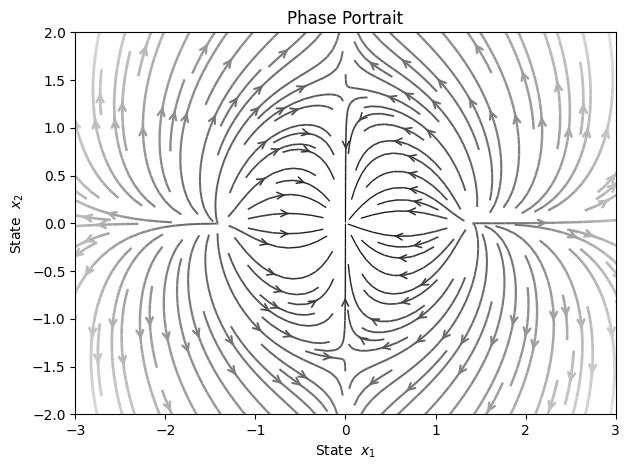

In [110]:
# Create a numerical function from symbolic one
f_num = sp.lambdify([x], f_symb)

def f(x, t):
    dx = f_num(x)[:,0]
    return dx

phase_portrait(f, x_range=[3, 2], density=1.5) 

### **Invariant Set Theorems and Lyapunov Functions**

In practice we are always interested in the regions in which system is tend to stay forever, it may be stable equalibrium, the error funel etc. However the vannila Lyapunov theory does not directly allow us to find such regions. Here we can use the help of the powerful **invariant set theorems**, attributed
to **La Salle** as **invariance principle**.  



The central concept in these theorems is that of **invariant set**

--- 

***A set $\mathcal{G}$ is an invariant set for a dynamical system if every system
trajectory which starts from a point in  $\mathcal{G}$ remains in $\mathcal{G}$ for all future time***

$$
    \mathbf{x}(0) \in \mathcal{G} \Rightarrow \mathbf{x}(t) \in \mathcal{G}, \forall t \in \mathbb{R} 
$$

---

A particular examples of invariant sets are, equilibria, limit cycles, energy level sets of conservative system and any particular solution of ODE.

In most cases, it is impractical to directly verify that a set is forward invariant or to construct forward invariant sets by examining all of the trajectories of a system. Instead, if a system has continuous solutions, we can evaluate if a set is forward invariant by checking that trajectories never leave the set through its boundary. We do this by comparing the angle between the dynamics $\mathbf{f}$ and the normal to the set’s boundary.  Yet again the Lyapunov functions provide a convenient tool to estimate the boundaries of invariant sets. One can easily find the the boundaries of invariance set $\Omega$ defined as $\partial \Omega$ by looking on such region $\{\mathbf{x}:\mathbf{V}(\mathbf{x})=c\}$ where $\dot{V}(\mathbf{x}) < 0$


### **Region of Attraction**

There is another very important connection between Lyapunov functions and the concept of an invariant set: **any sublevel set of a Lyapunov function is also an invariant set**. This gives us the ability to use sublevel sets of a Lyapunov function as approximations of the **region of attraction** for nonlinear systems.

---

For locally stable fixed point $\mathbf{x}_e$ the region of attraction (RoA) is the largest set $\mathcal{R}$: 
$$
    \mathbf{x}(0) \in \mathcal{R} \Rightarrow \lim_{t\rightarrow \infty} \mathbf{x}(t) = \mathbf{x}_e
$$

---


### **LaSalle's Invariance**

Consider an autonomous system, with $\mathbf{f}$ continuous, and let $V(\mathbf{x})$ be a scalar function with continuous
first partial derivatives. Assume that:

* for some $r>0$ the region $\Omega_r$ defined by $V(\mathbf{x})<r$ is bounded 
* $\dot{V}(\mathbf{x}) \leq 0$ for all $\mathbf{x} \in \Omega_r$ 

Let $\mathcal{R}$ be the set of all points within $\Omega_r$ where $\dot{V}(\mathbf{x})=0$, and $\mathcal{M}$ be the largest invariant set in $\mathcal{R}$. Then, every solution $\mathbf{x}$ originating in $\Omega_r$ tends to $\mathcal{M}$ as $t \rightarrow \infty$

Furthermore, if 
 in , then the origin is locally asymptotically stable and the set  is inside the region of attraction of this fixed point. Alternatively, if 
 in  and  is the only invariant subset of  where 
, then the origin is asymptotically stable and the set  is inside the region of attraction of this fixed point.

### **Estimation of Region of Attraction  via Sampling**

The idea is to test conditions of theorem on some domain of state space, more specifically on random points $\mathbf{x}_i$ within this domain. If conditions of theorem fails at least for one sample, namely $\dot{V}(x_i) \geq 0$ then the level set $V(\mathbf{x}) = V(\mathbf{x}) = c_i$ is not fully contained inside the region of attraction. Testing for the *large* amount of samples intuitevelly will yield the upper estimate of level set $V(\mathbf{x})< c <\hat{c}_u$. While increasing the amount of samples $\mathbf{x}_i$ one would expect for roa estimates to be tighter.  


In [111]:
def sampling_roa(f, V, nablaV, x_bounds, N=1000):
    x_min, x_max = x_bounds
    x_range = np.array(x_max) - np.array(x_min)
    n = np.shape(x_min)[0]

    c = np.inf
    ct = []

    for i in range(N):
        x_i = x_min + x_range*np.random.rand(n)
        V_i = V(x_i)
        if V_i <= c:
            dV_i = np.array(nablaV(x_i))@ np.array(f(x_i))
            if dV_i >= 0:
                c = V_i
                ct.append(c)  
    return c, ct

**Example: The RoA for cubic system**

Let us test RoA estimates on the cubic dynamical sytem:
$$
\dot{x} = -x + x^3
$$

In [112]:
def f(x):
    return -x +x**3

def V(x):
    return x**2

def nablaV(x):
    return 2*x

x_bounds = [-2], [2]


r, rt = sampling_roa(f, V, nablaV, x_bounds, N=500)
print(f'The set $V(x)<{r[0]}$ is estimate of the region of attraction')
# print(rt)

The set $V(x)<1.0030717708176176$ is estimate of the region of attraction


We can do very same with various systems and Lyapunov functions. Lets for intance use the  

In [113]:
def f(x,t = 0):
    dx1 = x[0]*(x[0]**2 + x[1]**2 - 2) - 4*x[0]*x[1]**2
    dx2 = 4*x[0]**2 *x[1] +x[1]*(x[0]**2 + x[1]**2 - 2)
    return dx1, dx2

def V(x):
    return x[0]**2 + x[1]**2

In [114]:
x_sym = sp.symbols('x_1, x_2')
V_sym = V(x_sym)

grad_V = sp.Matrix([V_sym]).jacobian(x) 
grad_V


Matrix([[2*x_1, 2*x_2]])

In [115]:
nablaV = sp.lambdify([x_sym], grad_V)

In [116]:
x_bounds = [-4, -4], [4, 4]

r, rt = sampling_roa(f, V, nablaV, x_bounds, N=1000)
r

2.035673157626181

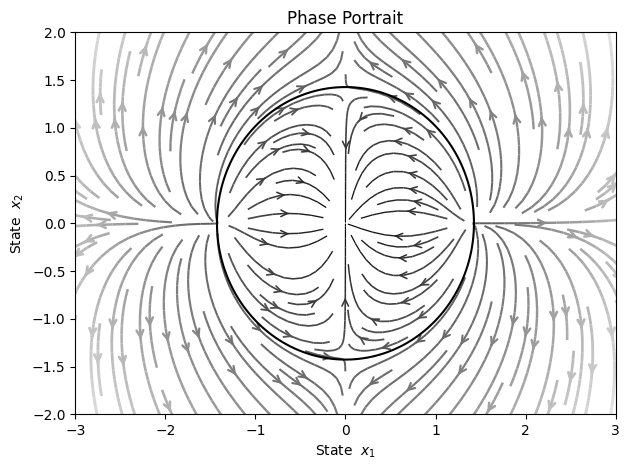

In [117]:
phase_portrait(f, x_range=[3, 2], density=1.5) 

# P, r = roa_params
delta = 0.025
x1range = np.arange(-2, 2, delta)
x2range = np.arange(-3, 3, delta)
X1, X2 = np.meshgrid(x1range,x2range)
X = [X1, X2]
ROA = V(X) - r
# ROA = P[0,0]*X1**2 + P[0,1]*2*X1*X2 + P[1,1]*X2**2 - r
plt.contour( X1, X2, ROA, [0], colors='k')
plt.show()

As we can see we are able to get satisfactory results in estimating RoA when **Lyapunov function is given** and match the shape of the desired region, however, it is not clear how to obtain the good candidate for general system. 


**Exercise: Region of attraction for Cart Pole balancing**

Let us now test the sampling method on roa estimation for linear controllers. 
As example consider the cart pole system presented in the [colab notebook](https://colab.research.google.com/drive/1F4FbgGSjZ-rxDbnQbZft2G6R_-MC18Ld#scrollTo=uJTVJ1pCYdHV).



Suppose that somebedy already give you the values for feedback gains for full state controller $\mathbf{u} = - \mathbf{K}\mathbf{x}$, where $\mathbf{x} = [\theta, \dot{\theta}, p, \dot{p}]^T$:


In [118]:
K = np.array([[139.78445986, 25.00055637, -31.6227766, -29.03589873]])

The Lyapunov function is given as well as $\mathbf{V} = \mathbf{x}^T \mathbf{P} \mathbf{x}$, with p.d. $\mathbf{P}$:

In [119]:

P = np.array([[19.43822824,  2.62513909, -7.90587009, -5.95477445],
              [ 2.62513909,  0.43677025, -1.30436178, -0.9558897 ],
              [-7.90587009, -1.30436178,  9.18195739,  3.71541707],
              [-5.95477445, -0.9558897 ,  3.71541707,  2.60558103]])

For the given feedback and Lyapunov candidate the estimate for the region of attraction 

The machinery so far has used optimization to find the largest region of attraction that can be certified **given a candidate Lyapunov function**.

Meanwhile for the linear systems the candidate is given by the solution of Lyapunov equation. So we can use this as a good starting point. The other approach is to use so called cost-to-go which is readily provided by optimal methods like LQR that we will study in further lectures.

### **Linearization based Lyapunov Candidate for RoA Estimation**

For some stable fixed points, we can certify the local stability with a linear analysis, and this linear analysis gives us a candidate quadratic Lyapunov function:
$$
    V = \mathbf{x}^T\mathbf{P}\mathbf{x}
$$

where $\mathbf{A}$ is the linearization of original nonlinear dynamics nearby $\mathbf{x}_e$ and $\mathbf{Q}$ is p.d matrix. 

Given $\mathbf{Q}$ one can then solve Lyapunov equation :
$$
    \mathbf{A}^T\mathbf{P} + \mathbf{A}\mathbf{P} = -\mathbf{Q}
$$

And find region of attraction as level set $\{\mathbf{x}:\mathbf{x}^T\mathbf{P}\mathbf{x}\leq r\}$ 



**Example: Two dimensional cubic system**

Let us test this approach on following system:

In [120]:
def f(x, t =0):
    x1, x2 = x
    dx1 = x2
    dx2 = -x1 + x1**3/3 - x2
    return dx1, dx2

x = sp.symbols(r'x_1, x_2')
f_sym = sp.Matrix([f(x, 0)]).T
f_sym

Matrix([
[                 x_2],
[x_1**3/3 - x_1 - x_2]])

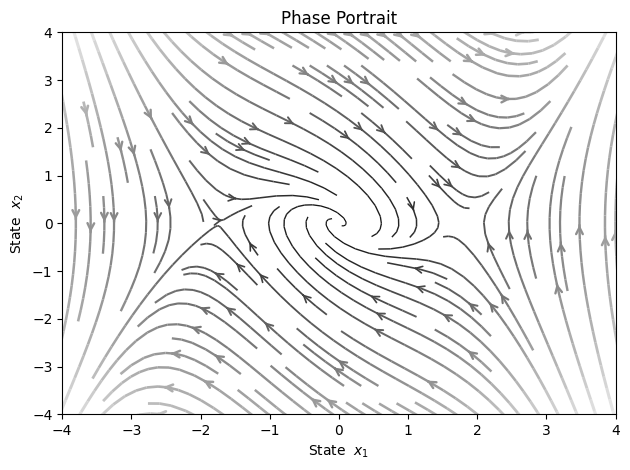

In [121]:
phase_portrait(f, x_range=[4, 4], density=1.2)

Firstly we find the Jacobian and evaluate at equilibrium:

In [122]:
jacobian = f_sym.jacobian(x)
jacobian

Matrix([
[         0,  1],
[x_1**2 - 1, -1]])

In [123]:
jacobian_num = sp.lambdify([x], jacobian)
A = np.array(jacobian_num([0, 0]), dtype='double')
print(f'The linearization nearby equilibrium is given by:\n{A}')

The linearization nearby equilibrium is given by:
[[ 0.  1.]
 [-1. -1.]]


In [124]:
from scipy.linalg import solve_continuous_lyapunov as lyap
Q = array([[1, 0],
           [0, 1]])
P = lyap(A.T, -Q)
print(f'The solution of Lyapunov equation is:\n{P}')
print(f'\nThe eigen values are:\n{eig(P)[0]}')


The solution of Lyapunov equation is:
[[1.5 0.5]
 [0.5 1. ]]

The eigen values are:
[1.80901699 0.69098301]


Once $\mathbf{P}$ is given we define Lyapunov candidate as $\mathbf{x}^T \mathbf{P}\mathbf{x}$ and estimate the region of attraction:

In [125]:
def V(x):
    return x[0]**2 *P[0,0] + 2*x[0]*x[1]*P[0,1] + x[1]**2 *P[1,1] 

x_sym = sp.symbols('x_1, x_2')
V_sym = V(x_sym)

grad_V = sp.Matrix([V_sym]).jacobian(x) 
nablaV = sp.lambdify([x_sym], grad_V)

x_bounds = [-4, -4], [4, 4]

r, rt = sampling_roa(f, V, nablaV, x_bounds, N=10000)
r


3.8972612835800042

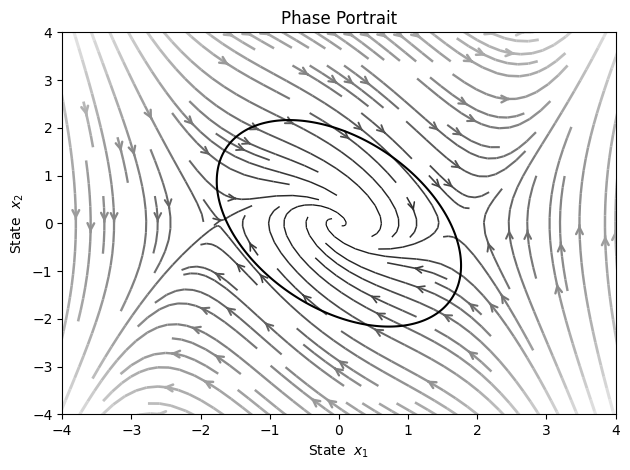

In [126]:
phase_portrait(f, x_range=[4, 4], density=1.2)

# P, r = roa_params
delta = 0.025
x1range = np.arange(-4, 4, delta)
x2range = np.arange(-4, 4, delta)
X1, X2 = np.meshgrid(x1range,x2range)
X = [X1, X2]
ROA = V(X) - r
plt.contour( X1, X2, ROA, [0], colors='k')
plt.show()